In [1]:
import numpy as np
import pandas as pd

#
import matplotlib.pyplot as plt
import seaborn as sns
## modelling
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder

## ensembles
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier

Importing CSV filres. df contains our data where as df1 contains the expleneation of what is in each coloumn of our data set in df.

In [2]:
df1=pd.read_csv("data_dictionary.csv", sep=";",index_col=0)
df=pd.read_csv("heart_disease_data.csv")

In [3]:
df1.head(20)

,Explanation,Unnamed: 2
Variable,,
HeartDisease,Respondents that have ever reported having cor...,NaN
BMI,Body Mass Index (BMI),NaN
Smoking,Have you smoked at least 100 cigarettes in you...,NaN
AlcoholDrinking,Heavy drinkers (adult men having more than 14 ...,NaN
Stroke,(Ever told) (you had) a stroke?,NaN
PhysicalHealth,"Now thinking about your physical health, which...",NaN
MentalHealth,"Thinking about your mental health, for how man...",NaN
DiffWalking,Do you have serious difficulty walking or clim...,NaN
Sex,Are you male or female?,NaN


In [4]:
df1.shape

(20, 2)

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NaN,DC


In [6]:
df.shape

(319795, 20)

# Data Preparation<a class="anchor" id="data_preparation"></a>

 Checking for duplicate rows.The below code shows that there are 254 rows that are duplicated in our data set

In [7]:
duplicate=df[df.duplicated()]
duplicate

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
19256,No,23.06,No,NaN,No,0.0,0.0,No,Male,40-44,White,No,Yes,Good,7.0,No,No,No,NaN,MI
20126,No,28.70,No,No,No,0.0,0.0,No,Male,60-64,White,No,Yes,Very good,8.0,No,No,No,NaN,ID
31335,No,27.26,No,No,No,0.0,0.0,No,Male,40-44,White,No,Yes,Excellent,7.0,No,No,No,NaN,HI
31503,No,28.70,No,No,No,0.0,0.0,No,Male,65-69,White,No,Yes,Very good,8.0,No,No,No,NaN,CO
31894,No,24.96,No,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Excellent,6.0,No,No,No,NaN,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311395,No,25.83,No,No,No,0.0,0.0,No,Male,45-49,White,No,Yes,Excellent,8.0,No,No,No,NaN,NJ
311669,No,25.83,No,No,No,0.0,0.0,No,Male,25-29,White,No,Yes,Very good,7.0,No,No,No,NaN,WA
313245,No,28.06,No,No,No,0.0,0.0,No,Female,40-44,White,No,Yes,Excellent,8.0,No,No,No,NaN,CT
314358,No,25.10,No,No,No,0.0,0.0,No,Male,55-59,White,No,Yes,Excellent,7.0,No,No,No,NaN,UT


We want to see the unique variables in our target column in our duplicated rows.

In [8]:
duplicate['HeartDisease'].value_counts()

No    254
Name: HeartDisease, dtype: int64

As the above result shows that there are only No in our target data set which are already in abendence so we can Droping Duplicates and keep there first occurance.

In [9]:
df=df.drop_duplicates(keep='first')
df.shape

(319541, 20)

In [10]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease_FamilyHistory',
       'State'],
      dtype='object')

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319541 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319541 non-null  object 
 1   BMI                         319541 non-null  float64
 2   Smoking                     319541 non-null  object 
 3   AlcoholDrinking             212788 non-null  object 
 4   Stroke                      318429 non-null  object 
 5   PhysicalHealth              319541 non-null  float64
 6   MentalHealth                319541 non-null  float64
 7   DiffWalking                 319541 non-null  object 
 8   Sex                         319541 non-null  object 
 9   AgeCategory                 319541 non-null  object 
 10  Race                        319541 non-null  object 
 11  Diabetic                    319541 non-null  object 
 12  PhysicalActivity            319541 non-null  object 
 13  GenHealth     

Now we would like to know the data types of our columns in our data set. We will use dtypes for that

In [12]:
## variable types
df.dtypes

HeartDisease                   object
BMI                           float64
Smoking                        object
AlcoholDrinking                object
Stroke                         object
PhysicalHealth                float64
MentalHealth                  float64
DiffWalking                    object
Sex                            object
AgeCategory                    object
Race                           object
Diabetic                       object
PhysicalActivity               object
GenHealth                      object
SleepTime                     float64
Asthma                         object
KidneyDisease                  object
SkinCancer                     object
HeartDisease_FamilyHistory     object
State                          object
dtype: object

In [13]:
df.describe(include=['object'])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
count,319541,319541,212788,318429,319541,319541,319541,319541,319541,319541,319541,319541,319541,319192,35261,319541
unique,2,2,2,2,2,2,14,6,4,2,5,2,2,2,2,51
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No,No,OH
freq,292168,187692,191014,306360,275131,167696,34108,244962,269403,247705,113727,276671,307762,289377,32006,6417


###  Number/fractions of null values<a class="anchor" id="null_values"></a>

Now we will check for NaN values in our data set. First we checked for nulls in our Number type data set

In [14]:
df.select_dtypes(include=['number']).isnull().sum()

BMI               0
PhysicalHealth    0
MentalHealth      0
SleepTime         0
dtype: int64

The above result shows that there are no nulls in our number data set, So we will now check for NaN in our Object type data set.

In [15]:
df.select_dtypes(include=['object']).isnull().sum()

HeartDisease                       0
Smoking                            0
AlcoholDrinking               106753
Stroke                          1112
DiffWalking                        0
Sex                                0
AgeCategory                        0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284280
State                              0
dtype: int64

This shows that there are 4 columns have NAN values in them so we need to handle NaN values as for testing and traing of data we cannot pass NaN values.

###  Distribution / range of target values<a class="anchor" id="target_distribution"></a>

Now we would like to know the distributation of Yes/No in our target data set.

In [16]:
df['HeartDisease'].value_counts()

No     292168
Yes     27373
Name: HeartDisease, dtype: int64

In [17]:
df["HeartDisease"].value_counts(normalize=True)

No     0.914337
Yes    0.085663
Name: HeartDisease, dtype: float64

This shows that the data set is quite Un-balanced data set which will give us problems while training and testing of our data.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

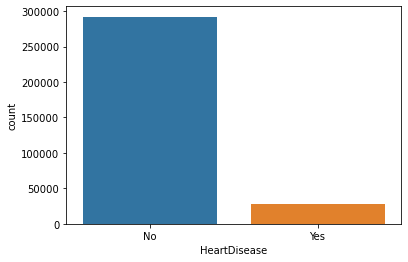

In [18]:
sns.countplot(data=df, x='HeartDisease')

### Variables Replacement

As for the methods that we will use to train our data set would not be able to undersatnd our object data so we will have replace that data set with integer or unit data set.

In [19]:
df['HeartDisease'].value_counts()

No     292168
Yes     27373
Name: HeartDisease, dtype: int64

As shown above we first target our target data set for replacement. Above results showthat the amout of yes and no in our target data set that need to be converted. We use replace function to replace Yes=1 and No=0 so that our data set is converted to int data set

In [20]:
df.HeartDisease.replace(('Yes', 'No'), (1, 0), inplace=True)

In [21]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,No,MT
1,0,20.34,No,NaN,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NaN,VT
2,0,26.58,Yes,NaN,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,NaN,WY
3,0,24.21,No,NaN,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No,VT
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NaN,DC


Now we see that in out data frame the target data set has been changed to 0's and 1's that we needed.

In [22]:
df['HeartDisease'].value_counts()

0    292168
1     27373
Name: HeartDisease, dtype: int64

We will do the same for other object data set.

In [23]:
df['Smoking'].value_counts()

No     187692
Yes    131849
Name: Smoking, dtype: int64

In [24]:
df.Smoking.replace(('Yes', 'No'), (1, 0), inplace=True)

In [25]:
df['Smoking'].value_counts()

0    187692
1    131849
Name: Smoking, dtype: int64

Repalcement of each objcet data set one by one will be quite lenghty so we will apply the replace function across all our data set at once.

In [26]:
df.replace(('Yes', 'No'), (1, 0), inplace=True)

In [27]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,0,16.60,1,0.0,0.0,3.0,30.0,0,Female,55-59,White,1,1,Very good,5.0,1,0,1.0,0.0,MT
1,0,20.34,0,NaN,1.0,0.0,0.0,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0.0,NaN,VT
2,0,26.58,1,NaN,0.0,20.0,30.0,0,Male,65-69,White,1,1,Fair,8.0,1,0,0.0,NaN,WY
3,0,24.21,0,NaN,0.0,0.0,0.0,0,Female,75-79,White,0,0,Good,6.0,0,0,1.0,0.0,VT
4,0,23.71,0,0.0,0.0,28.0,0.0,1,Female,40-44,White,0,1,Very good,8.0,0,0,0.0,NaN,DC


In [28]:
df.dtypes

HeartDisease                    int64
BMI                           float64
Smoking                         int64
AlcoholDrinking               float64
Stroke                        float64
PhysicalHealth                float64
MentalHealth                  float64
DiffWalking                     int64
Sex                            object
AgeCategory                    object
Race                           object
Diabetic                       object
PhysicalActivity                int64
GenHealth                      object
SleepTime                     float64
Asthma                          int64
KidneyDisease                   int64
SkinCancer                    float64
HeartDisease_FamilyHistory    float64
State                          object
dtype: object

Diabetic column was an object data set in the beganning which was suppose to be converted in to a integer data set but still in the above resulyt it shows that it is still a object that seams quite strange so we will try to see that is in the data set other then Yes & No that is not letting it cnvert to our desired data set.

In [29]:
df['Diabetic'].value_counts()

0                          269403
1                           40798
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

The above results show that there are 4  unique values in Diabetic data set that need to be handeled so that at the end we get in total of 2 Unique variables.

In [30]:
df.replace(('Yes (during pregnancy)', 'No, borderline diabetes'), (1, 0), inplace=True)

In [31]:
df['Diabetic'].value_counts()

0    276184
1     43357
Name: Diabetic, dtype: int64

# Handeling Null Values

Now we will like to remove the Nan variables from our numaric data set so that the data can be properly trained.

In [32]:
df.shape

(319541, 20)

In [33]:
df.select_dtypes(include=['number']).isnull().sum()

HeartDisease                       0
BMI                                0
Smoking                            0
AlcoholDrinking               106753
Stroke                          1112
PhysicalHealth                     0
MentalHealth                       0
DiffWalking                        0
Diabetic                           0
PhysicalActivity                   0
SleepTime                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284280
dtype: int64

We will replace out NaN values with 0's because that is one of the easies method that we know. Before choosing 0's we replacend them with 1's but that did not had that much effect of our ML algorithem's result so we choose 0's.

In [34]:
df['AlcoholDrinking'].fillna(value=0, inplace=True)
df['Stroke'].fillna(value=0, inplace=True)
df['SkinCancer'].fillna(value=0, inplace=True)
df['HeartDisease_FamilyHistory'].fillna(value=0, inplace=True)

In [35]:
df.select_dtypes(include=['number']).isnull().sum()

HeartDisease                  0
BMI                           0
Smoking                       0
AlcoholDrinking               0
Stroke                        0
PhysicalHealth                0
MentalHealth                  0
DiffWalking                   0
Diabetic                      0
PhysicalActivity              0
SleepTime                     0
Asthma                        0
KidneyDisease                 0
SkinCancer                    0
HeartDisease_FamilyHistory    0
dtype: int64

# Check features with  variance=1 and Eliminate them 

In [36]:
df.apply(lambda x: x.nunique(), axis=0)

HeartDisease                     2
BMI                           3609
Smoking                          2
AlcoholDrinking                  2
Stroke                           2
PhysicalHealth                  31
MentalHealth                    31
DiffWalking                      2
Sex                              2
AgeCategory                     14
Race                             6
Diabetic                         2
PhysicalActivity                 2
GenHealth                        5
SleepTime                       24
Asthma                           2
KidneyDisease                    2
SkinCancer                       2
HeartDisease_FamilyHistory       2
State                           51
dtype: int64

This shows that there are no features that have variance=1 so we can donot eliminate any of them based on variance.

# Data transformation

We wil first like to transform our catagorical data set by using One-Hot encoding 

In [37]:
df.select_dtypes(include=['object']).isnull().sum()

Sex            0
AgeCategory    0
Race           0
GenHealth      0
State          0
dtype: int64

In [38]:
dummy_dataset=pd.get_dummies(df['Sex'], prefix='Sex')
df= pd.concat([df,dummy_dataset], axis=1)
df.drop('Sex', axis=1, inplace=True)

In [39]:
dummy_dataset=pd.get_dummies(df['AgeCategory'], prefix='AgeCategory')
df= pd.concat([df,dummy_dataset], axis=1)
df.drop('AgeCategory', axis=1, inplace=True)

In [40]:
dummy_dataset=pd.get_dummies(df['Race'], prefix='Race')
df= pd.concat([df,dummy_dataset], axis=1)
df.drop('Race', axis=1, inplace=True)

In [41]:
dummy_dataset=pd.get_dummies(df['GenHealth'], prefix='GenHealth')
df= pd.concat([df,dummy_dataset], axis=1)
df.drop('GenHealth', axis=1, inplace=True)

In [42]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease_FamilyHistory', 'State', 'Sex_Female',
       'Sex_Male', 'AgeCategory_0', 'AgeCategory_18-24', 'AgeCategory_25-29',
       'AgeCategory_30-34', 'AgeCategory_35-39', 'AgeCategory_40-44',
       'AgeCategory_45-49', 'AgeCategory_50-54', 'AgeCategory_55-59',
       'AgeCategory_60-64', 'AgeCategory_65-69', 'AgeCategory_70-74',
       'AgeCategory_75-79', 'AgeCategory_80 or older',
       'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good'],
      dtype='object')

After applying One-hot Encoding on our catagorical data set we can see that it has increased our number of features but theis will help us out while traing our data in the future.

In [43]:
df.dtypes

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                        float64
Stroke                                 float64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                              int64
Diabetic                                 int64
PhysicalActivity                         int64
SleepTime                              float64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                             float64
HeartDisease_FamilyHistory             float64
State                                   object
Sex_Female                               uint8
Sex_Male                                 uint8
AgeCategory_0                            uint8
AgeCategory_18-24                        uint8
AgeCategory_25-29                        uint8
AgeCategory_3

# Handeling States 

All the features havebeen converted to Integer except our state variable that is still an object so we will have to deal with that.

In [44]:
df['State'].unique()


array(['MT', 'VT', 'WY', 'DC', 'PA', 'AK', 'KY', 'DE', 'CA', 'NM', 'WI',
       'VA', 'IN', 'IL', 'OR', 'MS', 'FL', 'OK', 'TN', 'LA', 'HI', 'AZ',
       'WA', 'NE', 'AL', 'MO', 'UT', 'NH', 'OH', 'NV', 'IA', 'KS', 'ID',
       'GA', 'MA', 'AR', 'MD', 'MI', 'CT', 'NJ', 'WV', 'ME', 'MN', 'CO',
       'TX', 'NY', 'SC', 'NC', 'SD', 'RI', 'ND'], dtype=object)

State feature has 51 unique object  that are quite alot if we want to transform it through one hot encoding as it is usually better to transform by One hot encoding if we have small number of unique variables

In [45]:
df_State = df[['State','HeartDisease']].groupby(['State']).mean()

In [46]:
df_State.head(15)

,HeartDisease
State,
AK,0.085406
AL,0.083454
AR,0.085633
AZ,0.087373
CA,0.089398
CO,0.090051
CT,0.082506
DC,0.083651
DE,0.080793


<AxesSubplot:xlabel='State', ylabel='count'>

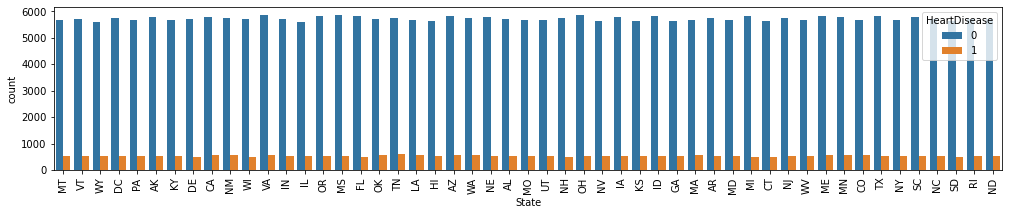

In [47]:
plt.figure(figsize=(17,3))
plt.xticks(rotation=90)
sns.countplot(data= df, x="State", hue="HeartDisease")

By ploting the frequency of 0's and 1's of our target data accorss each state, we can observe that we have some what equal distributation of 0 and 1 which means that it will not have any effect on the futre prediction. 

In addition to the pandas approach of lable encoding, scikit-learn provides similar functionality. Personally, I find using pandas a little simpler to understand but the scikit approach is optimal when you are trying to build a predictive. We will try using Ordinal Encoding for that purpose.

In [48]:
ord_enc = OrdinalEncoder()
ord_results = ord_enc.fit_transform(df[["State"]])
state_df = pd.DataFrame(
    ord_results,
    index=df.index,
    columns=['State_codes']
).astype(int)


In [49]:
state_df


,State_codes
0,26
1,46
2,50
3,46
4,7
...,...
319790,3
319791,30
319792,8
319793,44


This will give us a unique number against each state that we have.

In [50]:
#dummy_dataset=pd.get_dummies(df['State'], prefix='State')
df= pd.concat([df,state_df], axis=1)
df[["State", "State_codes"]].head(11)


,State,State_codes
0,MT,26
1,VT,46
2,WY,50
3,VT,46
4,DC,7
5,PA,38
6,AK,0
7,KY,17
8,MT,26
9,DE,8


In [51]:
df.drop('State', axis=1, inplace=True)

In [52]:
df.dtypes

HeartDisease                             int64
BMI                                    float64
Smoking                                  int64
AlcoholDrinking                        float64
Stroke                                 float64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                              int64
Diabetic                                 int64
PhysicalActivity                         int64
SleepTime                              float64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                             float64
HeartDisease_FamilyHistory             float64
Sex_Female                               uint8
Sex_Male                                 uint8
AgeCategory_0                            uint8
AgeCategory_18-24                        uint8
AgeCategory_25-29                        uint8
AgeCategory_30-34                        uint8
AgeCategory_3

# Final Data Frame

In [53]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,State_codes
0,0,16.60,1,0.0,0.0,3.0,30.0,0,1,1,...,0,0,0,1,0,0,0,0,1,26
1,0,20.34,0,0.0,1.0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,0,0,1,46
2,0,26.58,1,0.0,0.0,20.0,30.0,0,1,1,...,0,0,0,1,0,1,0,0,0,50
3,0,24.21,0,0.0,0.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,1,0,0,46
4,0,23.71,0,0.0,0.0,28.0,0.0,1,0,1,...,0,0,0,1,0,0,0,0,1,7


# Modelling


# a) Train/validation split 

Now we will start building our model for our data set.

To create our model first we need to split our data sets in two i.e. target and feature.

In [55]:
train_y=df[['HeartDisease']]
train_x=df.drop('HeartDisease', axis=1)

We will split the data set for devalopment and testing in 80-20 ratio.

In [56]:
X_dev, X_val, y_dev, y_val=model_selection.train_test_split(
    train_x,
    train_y,
    test_size=0.20,
    random_state=42
)

In [57]:
print(df.shape)
print(X_dev.shape)
print(X_val.shape)

(319541, 43)
(255632, 42)
(63909, 42)


Now we will split the devalopment data in to test & train in 30-70 ratio.

In [58]:
 X_train, X_test, y_train, y_test =model_selection.train_test_split(
    train_x,
    train_y,
    test_size=0.30,
    random_state=42

)

In [59]:
print(X_train.shape)
print(X_test.shape)

(223678, 42)
(95863, 42)


# Model definition

We are always using the same procedure to train a model: 

- Instantiate the model (chose algorithm & set parameters)
- Train the model (inference the set of instructions from data) 
- Evaluate model (calculate Disease probabilities over a dataset that the model has never seen before, and evaluate performance) 

# Decision Tree classifier

We will use Decision tree classifier first with a depth of 4

In [60]:
dt= DecisionTreeClassifier(max_depth=4, random_state=42)
dt

DecisionTreeClassifier(max_depth=4, random_state=42)

In [61]:
# training our data set according to decision tree
dt.fit( X =X_train, y= y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

We will now plot the results of our decision tree classifier

[Text(0.5, 0.9, 'DiffWalking <= 0.5\ngini = 0.157\nsamples = 100.0%\nvalue = [0.914, 0.086]'),
 Text(0.25, 0.7, 'Stroke <= 0.5\ngini = 0.118\nsamples = 86.1%\nvalue = [0.937, 0.063]'),
 Text(0.125, 0.5, 'Diabetic <= 0.5\ngini = 0.107\nsamples = 84.0%\nvalue = [0.943, 0.057]'),
 Text(0.0625, 0.3, 'AgeCategory_80 or older <= 0.5\ngini = 0.09\nsamples = 75.3%\nvalue = [0.953, 0.047]'),
 Text(0.03125, 0.1, 'gini = 0.078\nsamples = 71.3%\nvalue = [0.959, 0.041]'),
 Text(0.09375, 0.1, 'gini = 0.265\nsamples = 4.0%\nvalue = [0.843, 0.157]'),
 Text(0.1875, 0.3, 'Sex_Male <= 0.5\ngini = 0.246\nsamples = 8.7%\nvalue = [0.857, 0.143]'),
 Text(0.15625, 0.1, 'gini = 0.167\nsamples = 4.4%\nvalue = [0.908, 0.092]'),
 Text(0.21875, 0.1, 'gini = 0.315\nsamples = 4.3%\nvalue = [0.804, 0.196]'),
 Text(0.375, 0.5, 'Diabetic <= 0.5\ngini = 0.422\nsamples = 2.1%\nvalue = [0.697, 0.303]'),
 Text(0.3125, 0.3, 'GenHealth_Fair <= 0.5\ngini = 0.387\nsamples = 1.6%\nvalue = [0.738, 0.262]'),
 Text(0.28125, 0.1, '

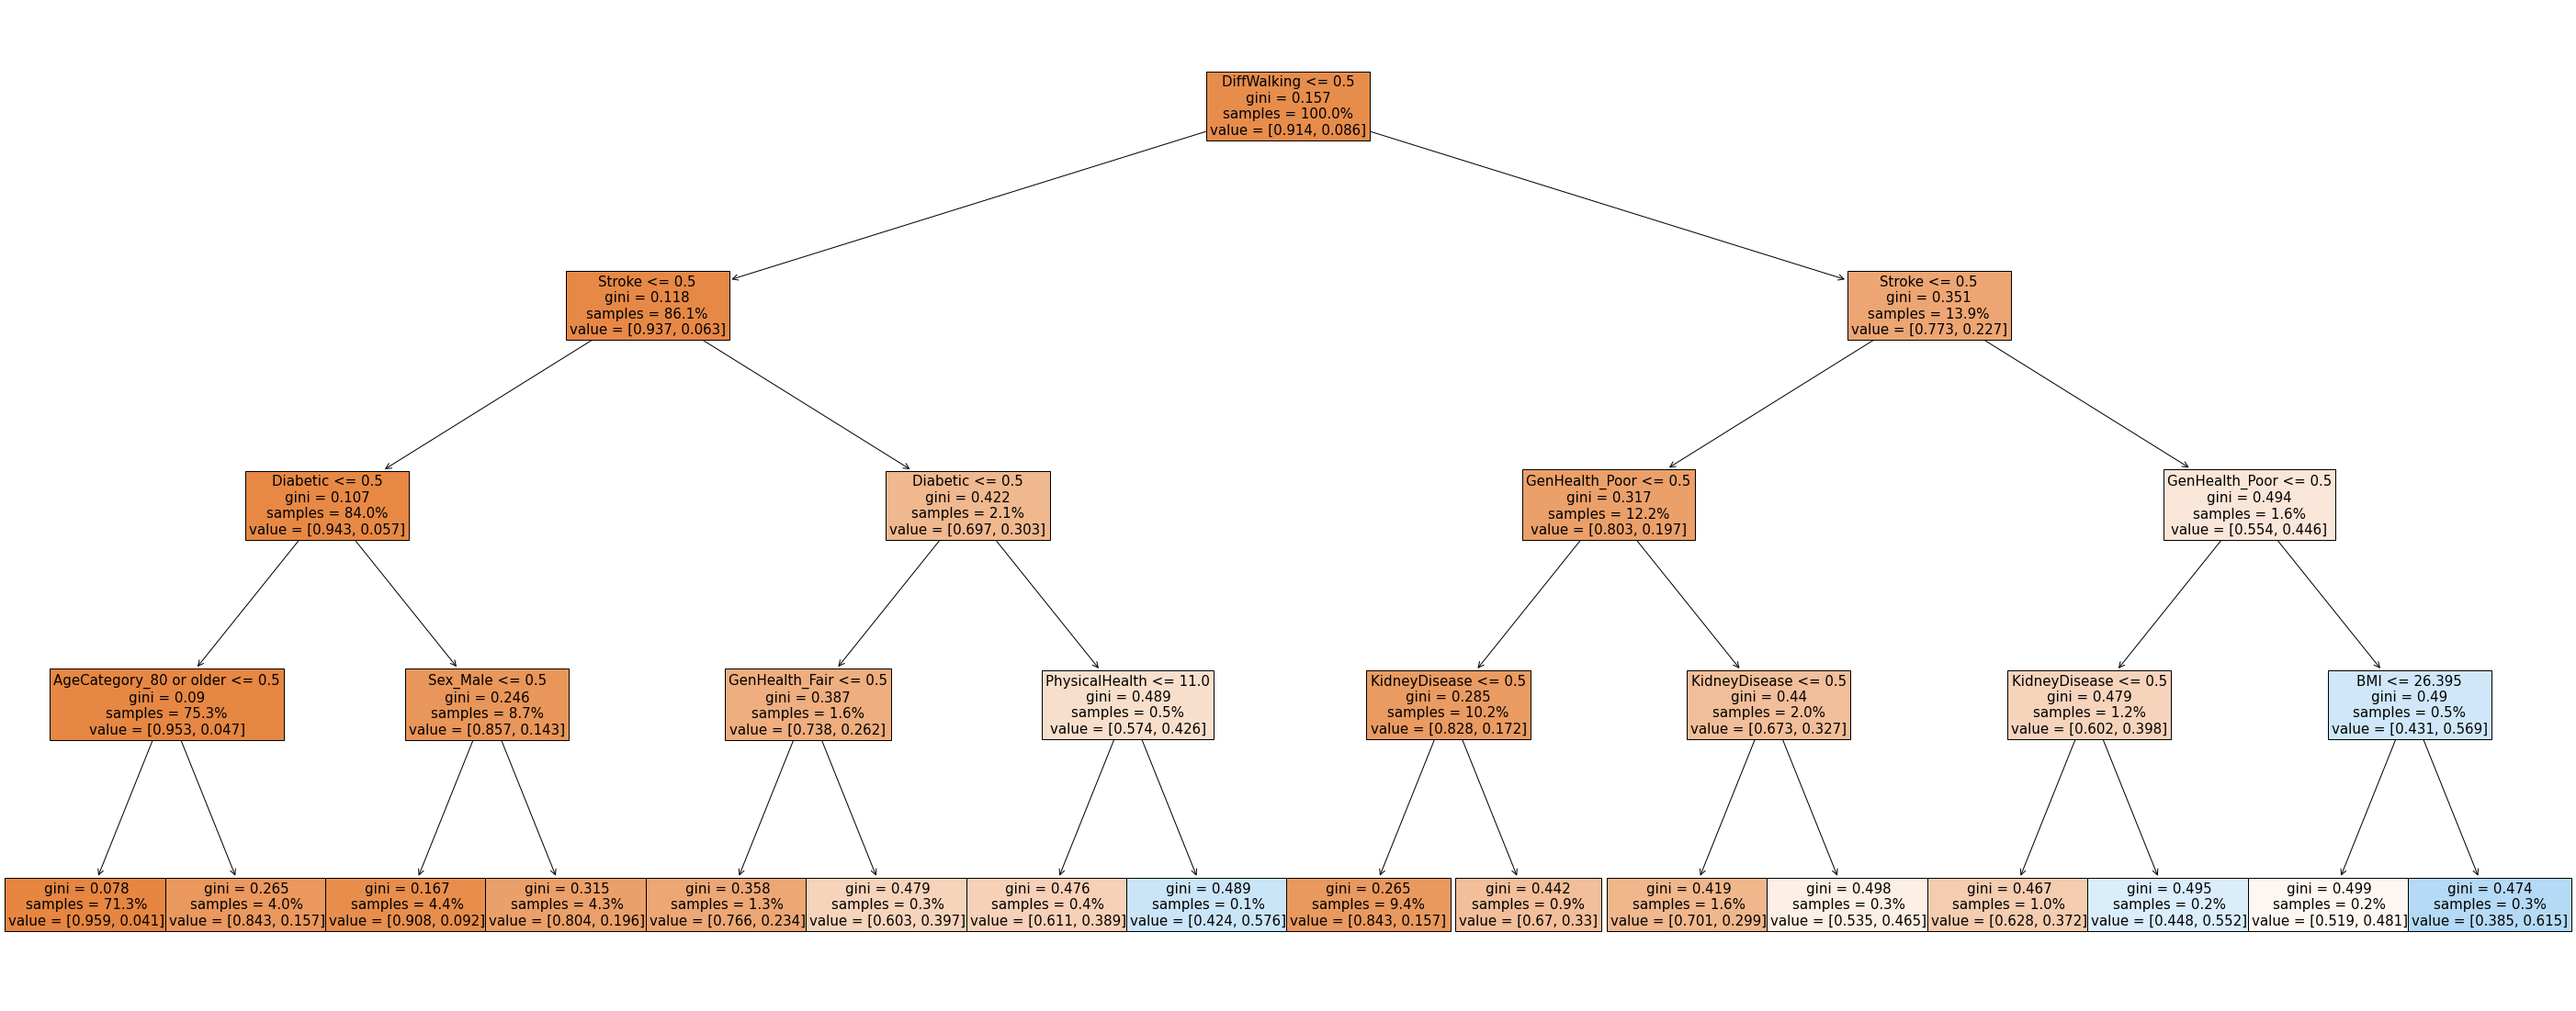

In [62]:
fig, ax= plt.subplots(figsize=(50,20))
tree.plot_tree(dt,
                ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               feature_names = X_test.columns)

After visulization of our tree we will now see which features has the most importance for our decision tree modeling

<BarContainer object of 10 artists>

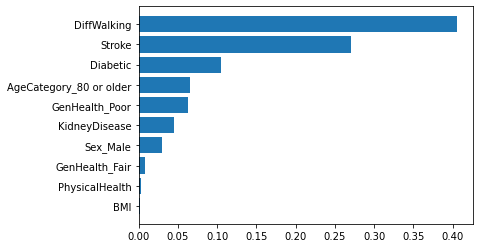

In [63]:
sorted_idx=dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:],dt.feature_importances_[sorted_idx][-10:])

It shows that the most important feature is DiffWalking. Now the question is do we want to remove it or leave it . We will not remove it as there is a strong relation of movements with heart disease. Most people who walk and exercise have good heart condition and if you have dificulty waliking you will avoid waling to much which can at the end casre heart disease.

# Getting predictions for the train set

In [64]:
# evaluationusing the matrx module
y_train_pred= pd.DataFrame({'DiseasePrediction':dt.predict(X_train),
    'DiseaseScore': dt.predict_proba(X_train)[:,1]},
     index=y_train.index)
results_df=y_train.join(y_train_pred, how='inner')
results_df.head()

,HeartDisease,DiseasePrediction,DiseaseScore
298262,1,0,0.092081
8284,0,0,0.040797
16843,1,0,0.157057
271227,0,0,0.040797
247678,0,0,0.040797


In [65]:
y_train_pred = pd.DataFrame(dt.predict(X_train), index=y_train.index, columns=['DiseasePrediction'])
results_df = y_train.join(y_train_pred, how= 'inner')
results_df['Success'] = (results_df['HeartDisease'] == results_df['DiseasePrediction']).astype(int)
print('TRAIN - We have correctly predicted {} from a total of {}. The accuracy is {}.'.format(results_df['Success'].sum(), results_df['Success'].count(), results_df['Success'].mean()))

TRAIN - We have correctly predicted 204733 from a total of 223678. The accuracy is 0.9153023542771305.


This shows that the predictions that we are doing gives us 95% accurecy.
It really seems that the model is doing an Good job. But are we being able to predict correctly HeartDisease? Or are we rather only predicting correctly non-HeartDisease?

# Confusion matrix

In [66]:
confusion_matrix_m= metrics.confusion_matrix(results_df['HeartDisease'], results_df['DiseasePrediction'])
Accuracy_m= metrics.accuracy_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Precision_m= metrics.precision_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Recall_m= metrics.recall_score(results_df['HeartDisease'], results_df['DiseasePrediction'])

print("confusion_matrix",confusion_matrix_m)

print("Accuracy_m",Accuracy_m)

print("Precision_m",Precision_m)

print("Recall_m",Recall_m)

confusion_matrix [[203974    530]
 [ 18415    759]]
Accuracy_m 0.9153023542771305
Precision_m 0.5888285492629945
Recall_m 0.039584854490455824


From the total number of positives predicted, 58% are indeed posative for Heart Disease
From the total number of positives in the dataset, I'm only capturing 4% which is not good at all

####  Evaluation over test dataset
#### a) Get predictions for the test set

In [67]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['DiseasePrediction'])
results_df_test = y_test.join(y_test_pred, how= 'inner')
results_df_test['Success'] = (results_df_test['HeartDisease'] == results_df_test['DiseasePrediction']).astype(int)

confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['HeartDisease'],results_df_test['DiseasePrediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['HeartDisease'], results_df_test['DiseasePrediction'])
Precision_m_test = metrics.precision_score(results_df_test['HeartDisease'],results_df_test['DiseasePrediction'])
Recall_m_test = metrics.recall_score(results_df_test['HeartDisease'],results_df_test['DiseasePrediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)

Confusion matrix:  [[87368   296]
 [ 7891   308]]
Accuracy:  0.9145968726203019
Precision:  0.5099337748344371
Recall:  0.03756555677521649


Our prediction of test data is also very bad as number of positives predicted, 28% are indeed posative for Heart Disease
From the total number of positives in the dataset, I'm only capturing 1% which is not good at all

# Model optemization

# Hyperparameter optimization

Let's evaluate how the model's performance varies with different values of the depth parameter

In [68]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree max_depth: 1. Train: 0.914278561145933 - Test: 0.9144716939799505
Tree max_depth: 2. Train: 0.914278561145933 - Test: 0.9144716939799505
Tree max_depth: 3. Train: 0.9149089315891594 - Test: 0.9149724085413559
Tree max_depth: 4. Train: 0.9153023542771305 - Test: 0.9145968726203019
Tree max_depth: 5. Train: 0.9154230635109398 - Test: 0.9146698934938402
Tree max_depth: 6. Train: 0.9161160239272526 - Test: 0.9145238517467636
Tree max_depth: 7. Train: 0.9166659215479395 - Test: 0.9140022740786331
Tree max_depth: 8. Train: 0.9175511225958745 - Test: 0.9140335687387209
Tree max_depth: 9. Train: 0.9188476291812337 - Test: 0.9133242231100633
Tree max_depth: 10. Train: 0.9207923890592727 - Test: 0.9121350260267257
Tree max_depth: 11. Train: 0.9229249188565706 - Test: 0.9115925852518698
Tree max_depth: 12. Train: 0.9260544175108861 - Test: 0.9095375692394354
Tree max_depth: 13. Train: 0.9297293430735253 - Test: 0.9080145624484942
Tree max_depth: 14. Train: 0.9341687604502902 - Test: 0.906116

#### Let's try setting the min_samples_split parameter to 50

In [69]:
for i in range(1, 20):
    dt = DecisionTreeClassifier(max_depth=i, random_state=42,min_samples_split=50)
    dt.fit(X_train, y_train)
    train_accuracy = dt.score(X_train, y_train)
    test_accuracy = dt.score(X_test, y_test)
    print('Tree max_depth: {}. Train: {} - Test: {}'.format(i, train_accuracy, test_accuracy))

Tree max_depth: 1. Train: 0.914278561145933 - Test: 0.9144716939799505
Tree max_depth: 2. Train: 0.914278561145933 - Test: 0.9144716939799505
Tree max_depth: 3. Train: 0.9149089315891594 - Test: 0.9149724085413559
Tree max_depth: 4. Train: 0.9153023542771305 - Test: 0.9145968726203019
Tree max_depth: 5. Train: 0.9154230635109398 - Test: 0.9146698934938402
Tree max_depth: 6. Train: 0.9161070825025259 - Test: 0.9145342833001262
Tree max_depth: 7. Train: 0.9166256851366696 - Test: 0.9140544318454461
Tree max_depth: 8. Train: 0.9172247605933529 - Test: 0.9140231371853583
Tree max_depth: 9. Train: 0.918168080902011 - Test: 0.913626738157579
Tree max_depth: 10. Train: 0.9192365811568415 - Test: 0.9127713507818449
Tree max_depth: 11. Train: 0.9200457800946003 - Test: 0.9124584041809666
Tree max_depth: 12. Train: 0.9210114539650748 - Test: 0.9113109333110794
Tree max_depth: 13. Train: 0.9218698307388299 - Test: 0.9107684925362236
Tree max_depth: 14. Train: 0.9226432639776821 - Test: 0.90993396

#### Let's repeat the evaluation procedure with the best performing estimator

<BarContainer object of 10 artists>

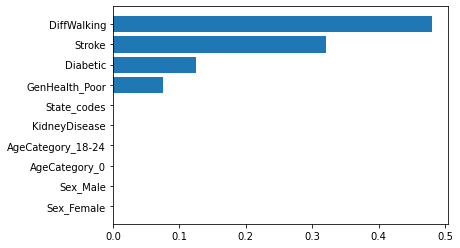

In [70]:
dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit( X =X_train, y= y_train)
sorted_idx=dt.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx][-10:],dt.feature_importances_[sorted_idx][-10:])

In [71]:
confusion_matrix_m= metrics.confusion_matrix(results_df['HeartDisease'], results_df['DiseasePrediction'])
Accuracy_m= metrics.accuracy_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Precision_m= metrics.precision_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Recall_m= metrics.recall_score(results_df['HeartDisease'], results_df['DiseasePrediction'])

print("confusion_matrix",confusion_matrix_m)

print("Accuracy_m",Accuracy_m)

print("Precision_m",Precision_m)

print("Recall_m",Recall_m)

confusion_matrix [[203974    530]
 [ 18415    759]]
Accuracy_m 0.9153023542771305
Precision_m 0.5888285492629945
Recall_m 0.039584854490455824


#### ROC curve

We will now plot a ROC curve for out test data and see if it gives us good results or not.

In [72]:
y_test_pred = pd.DataFrame({'DiseasePrediction' : dt.predict(X_test), 
                            'DiseaseScore': dt.predict_proba(X_test)[:,1]},
                            index=y_test.index)
results_df_test = y_test.join(y_test_pred, how= 'inner')
results_df_test['Success'] = (results_df_test['HeartDisease'] == results_df_test['DiseasePrediction']).astype(int)

confusion_matrix_m_test = metrics.confusion_matrix(results_df_test['HeartDisease'],results_df_test['DiseasePrediction'])
Accuracy_m_test = metrics.accuracy_score(results_df_test['HeartDisease'], results_df_test['DiseasePrediction'])
Precision_m_test = metrics.precision_score(results_df_test['HeartDisease'],results_df_test['DiseasePrediction'])
Recall_m_test = metrics.recall_score(results_df_test['HeartDisease'],results_df_test['DiseasePrediction'])

print("Confusion matrix: ", confusion_matrix_m_test)
print("Accuracy: ", Accuracy_m_test)
print("Precision: ", Precision_m_test)
print("Recall: ", Recall_m_test)

Confusion matrix:  [[87424   240]
 [ 7911   288]]
Accuracy:  0.9149724085413559
Precision:  0.5454545454545454
Recall:  0.03512623490669594


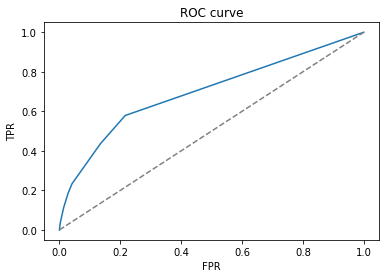

In [73]:


fpr, tpr, _ = metrics.roc_curve(results_df_test['HeartDisease'], results_df_test['DiseaseScore'])
plt.clf()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### ENSEMBLE MODELS 

now we would like to go for alternative models to improve our prediction.

#### a) Random Forest Classifier

The Random Forest generates a list of estimators with which we could also work as independent trees. They can be accessed using the estimators_ parameter from the model object

we will start with a randome forest  with 50 trees 

In [74]:
rf=RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=5, random_state=42)

In [75]:
rf.fit(X=X_train, y=np.ravel(y_train))

RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       random_state=42)

We  will convert our trees in a list that can be used for visulization later.

In [76]:
tree_list=rf.estimators_

In [77]:
tree_list

[DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                        random_state=787846414),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                        random_state=996406378),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                        random_state=423734972),
 DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=5,
                     

we can evaluate all the trees one at a time by simpely changing the index nuber of the tree.

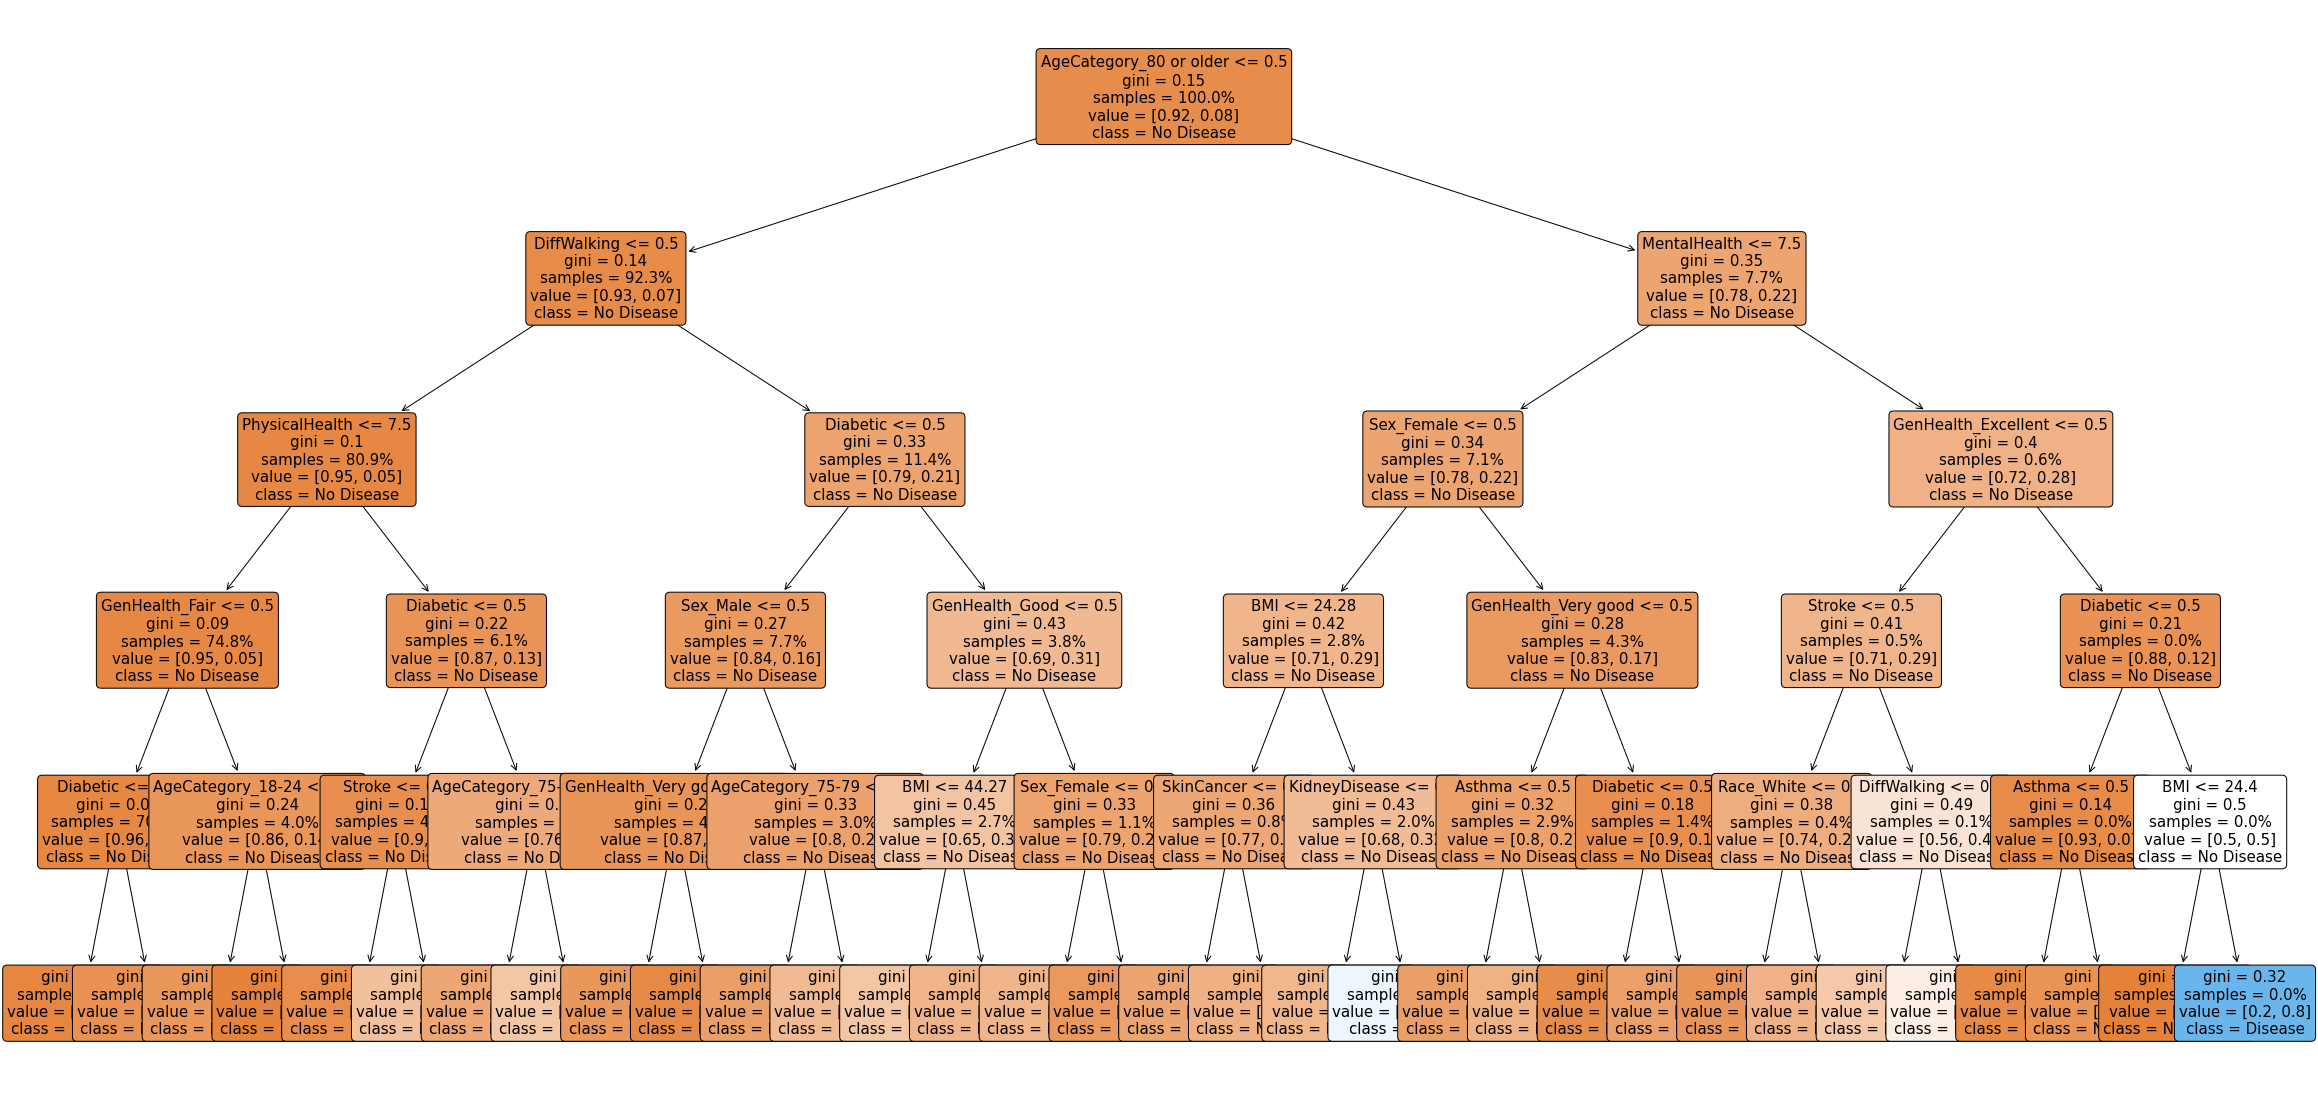

In [78]:
fig, ax = plt.subplots(figsize=(40,20))
tree.plot_tree(tree_list[1], 
               ax = ax, 
               fontsize = 15,
               proportion=True,
               filled = True, 
               impurity=True,
                rounded = True,
               precision = 2,

               class_names = ['No Disease', 'Disease'],
               feature_names = X_test.columns);

Now we will visulize the importance of each feature for our model we will use the 'feature_importances_' method

<AxesSubplot:>

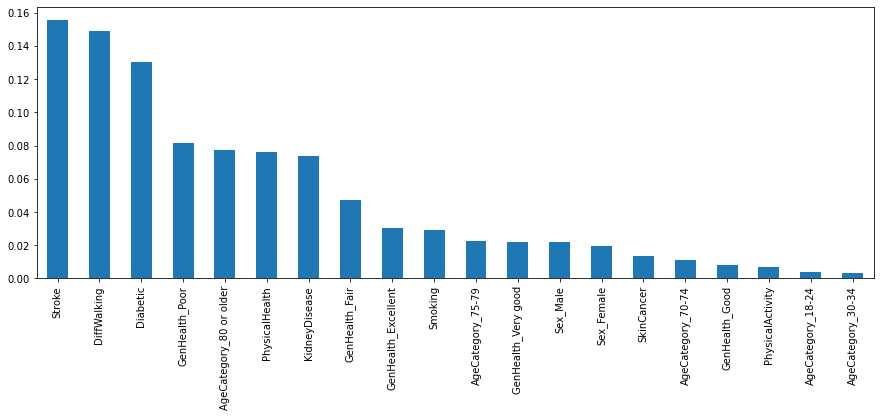

In [79]:
top_features = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [80]:
y_train_pred1= pd.DataFrame({'DiseasePrediction':rf.predict(X_train),
    'DiseaseScore': rf.predict_proba(X_train)[:,1]},
     index=y_train.index)
results_df=y_train.join(y_train_pred1, how='inner')
results_df.head()

,HeartDisease,DiseasePrediction,DiseaseScore
298262,1,0,0.157198
8284,0,0,0.039296
16843,1,0,0.127792
271227,0,0,0.048585
247678,0,0,0.044188


In [81]:
confusion_matrix_m= metrics.confusion_matrix(results_df['HeartDisease'], results_df['DiseasePrediction'])
Accuracy_m= metrics.accuracy_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Precision_m= metrics.precision_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Recall_m= metrics.recall_score(results_df['HeartDisease'], results_df['DiseasePrediction'])

print("confusion_matrix",confusion_matrix_m)

print("Accuracy_m",Accuracy_m)

print("Precision_m",Precision_m)

print("Recall_m",Recall_m)

confusion_matrix [[204501      3]
 [ 19163     11]]
Accuracy_m 0.9143143268448395
Precision_m 0.7857142857142857
Recall_m 0.0005736935433399395


#### ROC curve

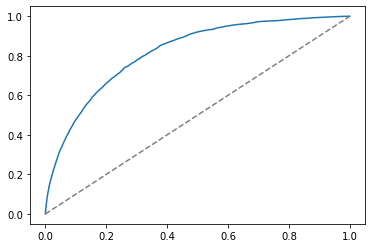

In [82]:
fpr, tpr, _=metrics.roc_curve(results_df["HeartDisease"] , results_df['DiseaseScore'])
plt.clf()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color='gray', linestyle="--")

The above ROC model shows that the model prediction is not good so we will try another classifier to see if that will gve us some good result.

#### b) GRADING And Boosting Classifier

Let's start training a gradient boosting model with 50 trees, and let's run a similar quick evaluation based on AUC score and ROC curve

In [83]:
gb=GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=5, random_state=42)
gb.fit(X=X_train, y=np.ravel(y_train))

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                           random_state=42)

<AxesSubplot:>

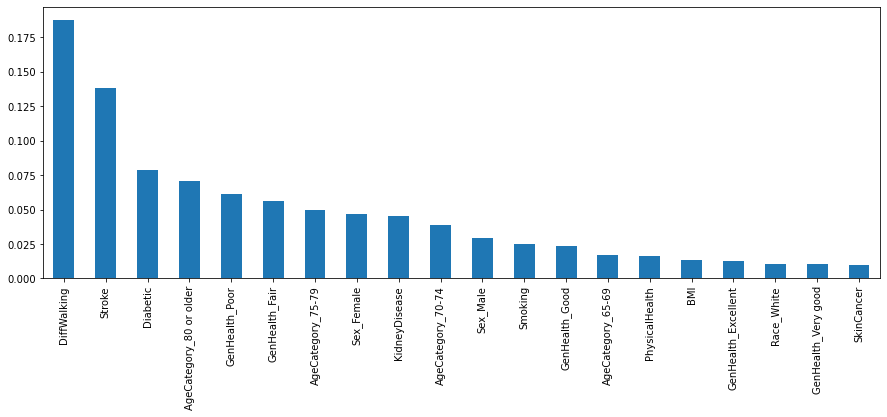

In [84]:
top_features = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [85]:
y_train_pred2= pd.DataFrame({'DiseasePrediction':gb.predict(X_train),
    'DiseaseScore': gb.predict_proba(X_train)[:,1]},
     index=y_train.index)
results_df=y_train.join(y_train_pred2, how='inner')

confusion_matrix_m= metrics.confusion_matrix(results_df['HeartDisease'], results_df['DiseasePrediction'])
Accuracy_m= metrics.accuracy_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Precision_m= metrics.precision_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Recall_m= metrics.recall_score(results_df['HeartDisease'], results_df['DiseasePrediction'])

print("confusion_matrix",confusion_matrix_m)

print("Accuracy_m",Accuracy_m)

print("Precision_m",Precision_m)

print("Recall_m",Recall_m)

confusion_matrix [[203379   1125]
 [ 17321   1853]]
Accuracy_m 0.9175332397464212
Precision_m 0.6222296843519141
Recall_m 0.09664128507353709


This model shows a bit improvement in precision but still not a good model to be used

In [86]:
y_train_pred2


,DiseasePrediction,DiseaseScore
298262,0,0.089145
8284,0,0.018345
16843,0,0.251270
271227,0,0.020416
247678,0,0.014241
...,...,...
119924,0,0.121136
259357,0,0.197471
131984,0,0.016509
146931,0,0.161205


#### Testing

In [87]:
y_test_pred2= pd.DataFrame({'DiseasePrediction':gb.predict(X_test),
    'DiseaseScore': gb.predict_proba(X_test)[:,1]},
     index=y_test.index)
results_df=y_test.join(y_test_pred2, how='inner')

confusion_matrix_m= metrics.confusion_matrix(results_df['HeartDisease'], results_df['DiseasePrediction'])
Accuracy_m= metrics.accuracy_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Precision_m= metrics.precision_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Recall_m= metrics.recall_score(results_df['HeartDisease'], results_df['DiseasePrediction'])

print("confusion_matrix",confusion_matrix_m)

print("Accuracy_m",Accuracy_m)

print("Precision_m",Precision_m)

print("Recall_m",Recall_m)

confusion_matrix [[87044   620]
 [ 7478   721]]
Accuracy_m 0.9155252808695743
Precision_m 0.5376584638329605
Recall_m 0.08793755336016587


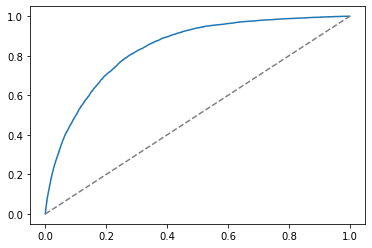

In [88]:
fpr, tpr, _=metrics.roc_curve(results_df["HeartDisease"] , results_df['DiseaseScore'])
plt.clf()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color='gray', linestyle="--")

# Gradient Boosting model with undersampling<a class="anchor" id="xgboost_under"></a>

The above models still show poor results which is caused due to un_balaced data so we will have to some how increase the # of 1's and decrese # of 0's to get some what good result.

Lets try Under sampeling our data set to some what balance or target data set

In [89]:
print("percentage of 0s", y_dev[y_dev['HeartDisease']==0].shape[0]/y_dev.shape[0]*100)
print("percentage of 1s", 100-y_dev[y_dev['HeartDisease']==0].shape[0]/y_dev.shape[0]*100)

percentage of 0s 91.4439506791012
percentage of 1s 8.556049320898794


We are using an undersampling approach. We'll rebalance the data to achieve a 16-84% distribution in our devalopment data set

Let's split 0 and non-0 registers into two independent dataframes

In [90]:
X_dev_zeros=X_dev[y_dev['HeartDisease']==0]
y_dev_zeros=y_dev[y_dev['HeartDisease']==0]

In [91]:
X_dev_nonzero=X_dev[y_dev['HeartDisease']!=0]
y_dev_nonzero=y_dev[y_dev['HeartDisease']!=0]

In [92]:
print(X_dev_zeros.shape)
print(X_dev_nonzero.shape)

(233760, 42)
(21872, 42)


increase # of non_zeros to 16% from 8.5%

In [93]:
1/(5+1)*100


16.666666666666664

In [94]:
X_dev_nonzero.shape[0]

21872

In [95]:
n_zeros= X_dev_nonzero.shape[0]*5
n_zeros


109360

We will take randome sampleas of zeros which are 5 times higher then our non-zero data set.

In [96]:
X_dev_zero_sample=X_dev_zeros.sample(n=n_zeros, random_state=23)
y_dev_zero_sample=y_dev_zeros.sample(n=n_zeros, random_state=23)

In [97]:
X_dev_zero_sample.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,SleepTime,...,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,State_codes
283788,30.40,0,0.0,0.0,30.0,0.0,1,0,0,10.0,...,0,0,1,0,0,1,0,0,0,37
106390,32.27,0,0.0,0.0,2.0,1.0,0,0,1,8.0,...,0,0,0,1,0,0,0,0,1,3
12580,20.98,0,0.0,0.0,0.0,0.0,0,0,1,8.0,...,0,0,0,1,1,0,0,0,0,28
99290,35.87,1,0.0,0.0,7.0,0.0,0,0,1,10.0,...,0,0,0,1,0,0,1,0,0,47
118916,26.22,1,0.0,0.0,0.0,0.0,0,0,1,7.0,...,0,0,0,1,0,0,0,0,1,17


In [98]:
print(X_dev_zero_sample.shape)
print(X_dev_nonzero.shape)

(109360, 42)
(21872, 42)


Now we will concatinate zeros and non-zero sampled data to form a data set that will be used in the future processing

In [99]:
X_dev_sample=pd.concat([X_dev_nonzero,X_dev_zero_sample])
y_dev_sample=pd.concat([y_dev_nonzero,y_dev_zero_sample])

In [100]:
X_train_s,X_test_s,y_train_s,y_test_=model_selection.train_test_split(X_dev_sample,y_dev_sample,
random_state=23, 
test_size=0.3)

In [101]:
gb=GradientBoostingClassifier(n_estimators=50, max_depth=5, min_samples_split=5, random_state=42)
gb.fit(X=X_train_s, y=np.ravel(y_train_s))

GradientBoostingClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                           random_state=42)

<AxesSubplot:>

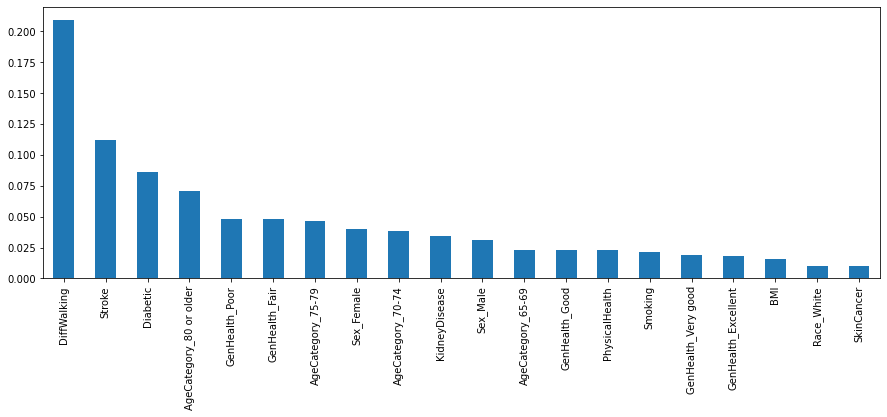

In [102]:
top_features = pd.Series(gb.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(15,5))
top_features.plot(kind='bar')

In [103]:
y_train_pred2= pd.DataFrame({'DiseasePrediction':gb.predict(X_train_s),
    'DiseaseScore': gb.predict_proba(X_train_s)[:,1]},
     index=y_train_s.index)
results_df=y_train.join(y_train_pred2, how='inner')

confusion_matrix_m= metrics.confusion_matrix(results_df['HeartDisease'], results_df['DiseasePrediction'])
Accuracy_m= metrics.accuracy_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Precision_m= metrics.precision_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Recall_m= metrics.recall_score(results_df['HeartDisease'], results_df['DiseasePrediction'])

print("confusion_matrix",confusion_matrix_m)

print("Accuracy_m",Accuracy_m)

print("Precision_m",Precision_m)

print("Recall_m",Recall_m)

confusion_matrix [[65103  1883]
 [ 9728  3705]]
Accuracy_m 0.8556186970740746
Precision_m 0.6630279169649248
Recall_m 0.2758132956152758


### Testing & ROC curve

In [104]:
y_test_pred2= pd.DataFrame({'DiseasePrediction':gb.predict(X_test),
    'DiseaseScore': gb.predict_proba(X_test)[:,1]},
     index=y_test.index)
results_df=y_test.join(y_test_pred2, how='inner')

confusion_matrix_m= metrics.confusion_matrix(results_df['HeartDisease'], results_df['DiseasePrediction'])
Accuracy_m= metrics.accuracy_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Precision_m= metrics.precision_score(results_df['HeartDisease'], results_df['DiseasePrediction'])
Recall_m= metrics.recall_score(results_df['HeartDisease'], results_df['DiseasePrediction'])

print("confusion_matrix",confusion_matrix_m)

print("Accuracy_m",Accuracy_m)

print("Precision_m",Precision_m)

print("Recall_m",Recall_m)

confusion_matrix [[84801  2863]
 [ 6030  2169]]
Accuracy_m 0.9072321959462983
Precision_m 0.43104133545310014
Recall_m 0.2645444566410538


This shows that By under sampeling our data our output as become even worse the that of simple gradient Boosting i.e precision is now 43% from 53%

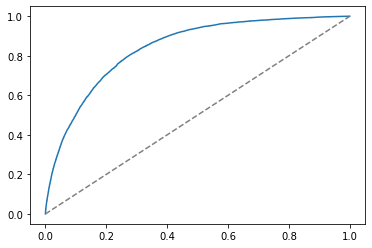

In [105]:
fpr, tpr, _=metrics.roc_curve(results_df["HeartDisease"] , results_df['DiseaseScore'])
plt.clf()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], color='gray', linestyle="--")

### FINAL MODEL COMPARISON (Decison Tree vs Random Forest vs Gradient Boosting)

In [106]:
RANDOM_STATE = 42
n_estimators = 50
max_depth = 5

models = [ 
    ('DecisionTree', DecisionTreeClassifier(max_depth=max_depth, random_state=42)),
    ('RandomForest', RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE)),
    ('GradientBoosting', GradientBoostingClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=RANDOM_STATE))
]

ROC AUC Score for DecisionTree: 0.745877514320776
ROC AUC Score for RandomForest: 0.8120324915981078
ROC AUC Score for GradientBoosting: 0.8377152724366135


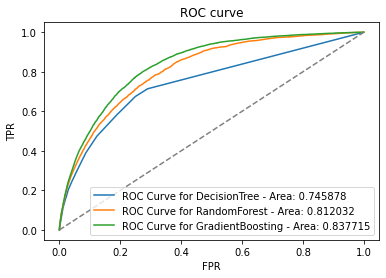

In [107]:
plt.clf()
for model in models:
    model_name = model[0]
    model_instance = model[1]
    model_instance.fit(X_train, np.ravel(y_train))
    predictions = model_instance.predict_proba(X_test)[:,1]
    auc_score = metrics.roc_auc_score(y_test, predictions)
    print('ROC AUC Score for {}: {}'.format(model_name, auc_score))
    fpr, tpr, _ = metrics.roc_curve(y_test, predictions)
    plt.plot(fpr, tpr, label='ROC Curve for {} - Area: {:2f}'.format(model_name, auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC curve')
plt.show()